<a href="https://colab.research.google.com/github/StacyWK/ResidenceApp/blob/master/NetflixStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [9]:
#load data
from google.colab import files
uploaded = files.upload()

Saving NFLX_Stock.csv to NFLX_Stock.csv


In [10]:
#Store data into a data frame
df = pd.read_csv('NFLX_Stock.csv')
df.head(6)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
5,2002-05-31,1.078571,1.071429,1.078571,1.076429,8464400.0,1.076429


In [11]:
#Get number of trading days
df.shape

(4881, 7)

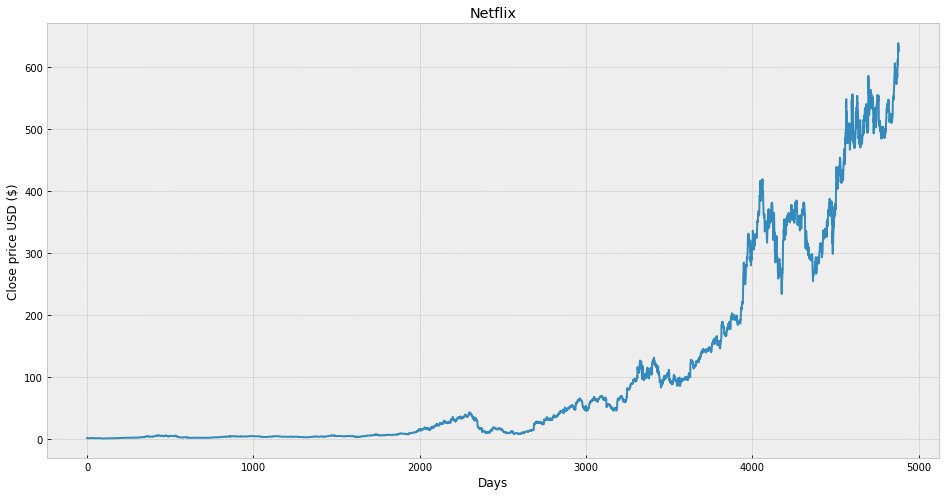

In [13]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.show()

In [14]:
#Get close price
df = df[['Close']]
df.head(4)

,Close
0,1.196429
1,1.210000
2,1.157143
3,1.103571


In [17]:
#Create variable to predict x days nto the future
future_days = 25
#Create new column (target) shifted x units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)


,Close,Prediction
4877,639.099976,NaN
4878,631.849976,NaN
4879,632.659973,NaN
4880,627.039978,NaN


In [18]:
#Create feature dataset (X) any convert to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)


[[  1.19642901]
 [  1.21000004]
 [  1.157143  ]
 ...
 [582.07000732]
 [588.54998779]
 [590.5300293 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [20]:
#Create target dataset (y) and convert to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  0.999286     1.02785695   1.17285705 ... 631.84997559 632.65997314
 627.03997803]


In [21]:
#Split dataset into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.25)

In [22]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear reggression model
lr = LinearRegression().fit(x_train, y_train)

In [23]:
#Get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[515.15002441],
       [510.82000732],
       [517.34997559],
       [524.89001465],
       [520.54998779],
       [519.9699707 ],
       [515.84002686],
       [512.40002441],
       [510.72000122],
       [515.91998291],
       [517.91998291],
       [518.90997314],
       [521.86999512],
       [543.71002197],
       [546.88000488],
       [553.33001709],
       [553.40997314],
       [547.58001709],
       [550.11999512],
       [558.91998291],
       [566.17999268],
       [569.19000244],
       [582.07000732],
       [588.54998779],
       [590.5300293 ]])

In [24]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[606.71002197 606.04998779 597.53997803 598.7199707  470.5
 565.16998291 539.80999756 586.5        589.34997559 539.80999756
 590.5300293  569.19000244 593.26000977 592.39001465 592.64001465
 583.84997559 521.65997314 610.34002686 613.15002441 603.34997559
 634.80999756 639.09997559 631.84997559 632.65997314 632.65997314]

[525.94377839 521.53262083 528.18495459 535.86628693 531.44493204
 530.85404597 526.64671084 523.14224597 521.43074071 526.72816519
 528.76564332 529.77418505 532.78967506 555.03896359 558.26834902
 564.83922842 564.92068278 558.9814788  561.56905364 570.53394497
 577.93000053 580.99641506 594.11777919 600.71918843 602.73633406]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


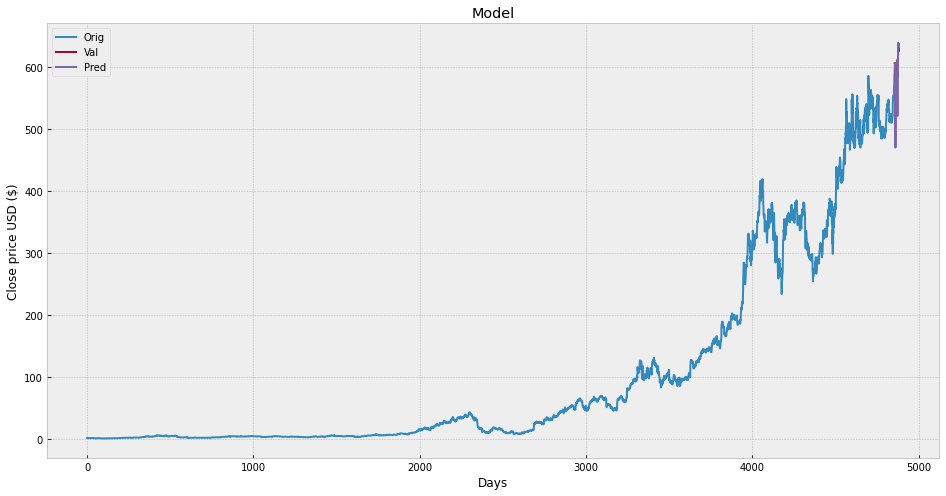

In [25]:
#Visualize the data
predictions = tree_prediction

#Valid data
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


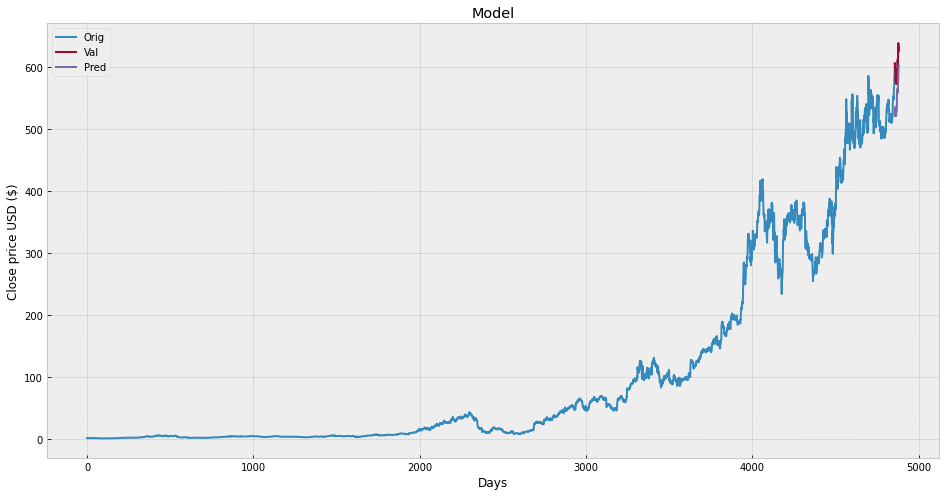

In [26]:
#Visualize the data
predictions = lr_prediction

#Valid data
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()